# Binary Text Classifier for Violence Detection

## Overview
This notebook, created by Jesus Mendez, features a binary classification system designed to differentiate between violent and non-violent text entries. It utilizes machine learning algorithms, specifically Multinomial Naive Bayes, to train and evaluate a model on processed textual data.

## Functionality
- **Data Processing:** Reads and processes text data from CSV files, extracting features and labels.
- **Text Vectorization:** Implements CountVectorizer to convert text into a binary format suitable for machine learning.
- **Model Training:** Trains a Multinomial Naive Bayes classifier.
- **Model Evaluation:** Evaluates the model's performance using accuracy metrics and generates a classification report.
- **Visualization:** Displays a confusion matrix to illustrate the model's performance.

## Key Features
- **Binary Classification:** Classifies text as either 'violent' or 'non-violent'.
- **Vectorization and Normalization:** Transforms textual data into a numeric format that is normalized for the classification model.
- **Performance Metrics:** Provides detailed metrics including accuracy and a classification report to assess the effectiveness of the classifier.

## Output
- Outputs include the accuracy of the model, a detailed classification report, and a confusion matrix visualizing the model's performance.

## Author
- **Name:** Jesus Mendez

This notebook is essential for researchers and practitioners working on content moderation, safety monitoring, or any domain where detecting violent content is critical.


In [59]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import random
from sklearn.preprocessing import normalize
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Nombre del archivo CSV
violencia = "violencia_procesado.csv"

# Listas para almacenar los textos y los números
violentos = []
vectorViolentos = []

# Abre el archivo CSV y procesa los datos
with open(violencia, 'r') as archivo:
    lector_csv = csv.reader(archivo)
    next(lector_csv)  # Ignorar el encabezado

    for fila in lector_csv:
        texto = fila[0]  # El primer elemento de la fila es el texto
        numeros_fila = [int(x) for x in fila[1:]]  # Convertir los números a enteros
        violentos.append(texto)
        vectorViolentos.append(numeros_fila)

# Ahora tienes los textos en la lista "textos" y los números en la lista "numeros"
print("Textos:", violentos)
print("Números:", vectorViolentos)


Textos: ['seguridad   detener policia municipal dos hombre robo casa habitacion puebla accion recuperar computadora portatil equipo audio dispositivo comunicacion movil articulo urbano| noticia    ', 'accidente   @traficogt paso desnivel final 20 calle zona 10 ingreso santa catarina pinula persona fallecido  ', 'endesarrollo | camion transportar jugador precipitar barranco 7 metro profundidad accidente ocurrir carretera litoral altura canton cipr conchagua union reporto @bomberossv  ', 'sujeto izq aprehendir hacer 2 semana robo cable @cfemx   ayer nuevamente robar pasar mp @ucs_gcdmx @nenulo @claudiashein no haber alumbrado publico 3era secc tlatelolco @manuelbartlett @suterm_nacional  ', 'precaucionvial zacatecas registrar accidente vial cerca km 027 + 500 carreterar 2870 libramiento victor rosal tramo atiendo indicacion vial  ', 'accidente bogota-mosquera rn50-08a gt;oriente traficobogoto trafico avanzando1h 7 mas lento habitual    ', 'perder vida masculino accidente mexico-veracruz 

In [26]:
# Nombre del archivo CSV
noViolencia = "noViolencia_procesado.csv"

# Listas para almacenar los textos y los números
noViolentos = []
vectorNoViolentos = []

# Abre el archivo CSV y procesa los datos
with open(noViolencia, 'r') as archivo:
    lector_csv = csv.reader(archivo)
    next(lector_csv)  # Ignorar el encabezado

    for fila in lector_csv:
        texto = fila[0]  # El primer elemento de la fila es el texto
        numeros_fila = [int(x) for x in fila[1:]]  # Convertir los números a enteros
        noViolentos.append(texto)
        vectorNoViolentos.append(numeros_fila)

# Ahora tienes los textos en la lista "textos" y los números en la lista "numeros"
print("Textos:", noViolentos)
print("Números:", vectorNoViolentos)


Textos: ['moral eeuu sufrir derrota vergonzoso terrorismo narcotrafico narcoterrorismodomestico     ', 'accion hacer ser bello persona no color piel dinero joven hermoso gesto robar corazon  ', '20 ano accidente convertir alex zanardi leyenda  ', 'llegar castigo max verstappen   neerlandes tener tres posicion sancion parrilla salida russiangp accidente protagonizar lewis hamilton italiangp    opinar decision fia | f1  ', 'caracol enterar el accidente matar babys  ', 'primero foto chapo guzman carcel estados unidos pagar condena narcotrafico   segundo foto futuro honorable representante camara jesus santrich dos narcotraficante ejecutado justicia disfrutar falta justicia  ', '5sep   expulsion comunidad debido identidad genero sumar prejuicio moral conservador violencia amenaza vivir cuerpo mujerestransindigena  ', 'no sentir seguro casa viv situacion violencia domestico llamar 911 di ser codigo violeta   autoridad correspondiente acudir brindarte apoyo necesita    no estar solo  ', '@vi

In [27]:
datos = np.array(violentos + noViolentos)
vectorDatos = np.array(vectorViolentos + vectorNoViolentos)
clases = np.array([1] * len(violentos) + [0] * len(noViolentos))
    
# Establece la semilla para que el reordenamiento sea reproducible
semilla = 0  # Puedes usar cualquier valor como semilla
np.random.seed(semilla)

# Realiza el reordenamiento aleatorio de los arreglos
np.random.shuffle(datos)
np.random.shuffle(vectorDatos)
np.random.shuffle(clases)




In [54]:

# Crear un vectorizador de texto (puede personalizarse con opciones)
vectorizer = CountVectorizer (binary=True)

vectorCorpus = normalize(vectorizer.fit_transform(datos).toarray())

datosCompletos = np.concatenate((vectorCorpus, vectorDatos), axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(vectorCorpus, clases, test_size=0.2, random_state=42)

# Entrenar un modelo de Multinomial Naive Bayes
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_NB.predict(X_test)

In [57]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

print(f"Precisión del modelo: {accuracy}")
print(reporte_clasificacion)

Precisión del modelo: 0.5716666666666667
              precision    recall  f1-score   support

           0       0.58      0.95      0.72       352
           1       0.34      0.04      0.07       248

    accuracy                           0.57       600
   macro avg       0.46      0.49      0.40       600
weighted avg       0.48      0.57      0.45       600



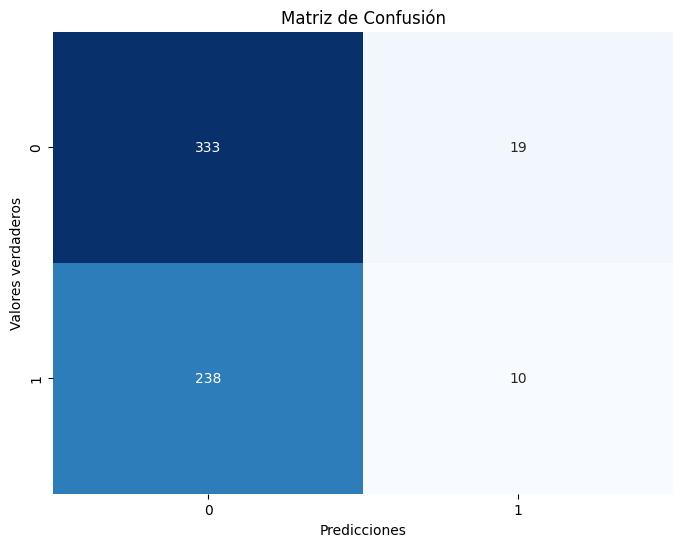

In [60]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()